# Analysis of TEBD on the Ising Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from tebd.tebd import run_tebd_ising

## Effect of $\lambda$

In [2]:
Ns = [3, 6, 9, 12]

In [3]:
lmdas = np.linspace(0, 2, 20)

In [4]:
observables = ['energy']

In [5]:
energies_N_lmda = np.zeros((len(Ns), len(lmdas)))

with tqdm(total=len(Ns) * len(lmdas)) as pbar:
    for i in range(len(Ns)):
        for j in range(len(lmdas)):
            observables_at_midsteps = run_tebd_ising(
                Ns[i], lmda=lmdas[j], observables=observables, print_to_stdout=False
            )
            energies_N_lmda[i, j] = observables_at_midsteps["energy"][-1]
            pbar.update(1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [07:38<00:00,  5.73s/it]


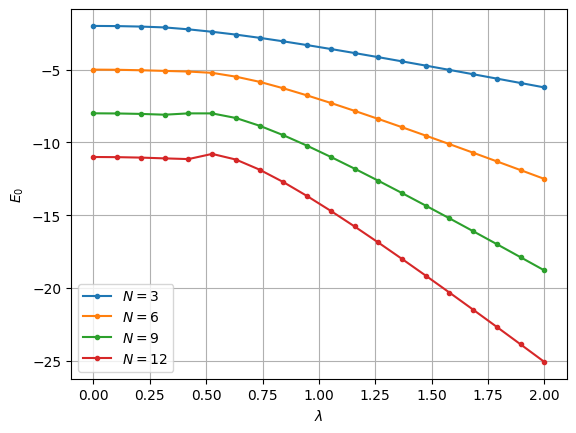

In [6]:
plt.plot(lmdas, energies_N_lmda[0], 'o-', markersize=3, label=f"$N = {Ns[0]}$")
plt.plot(lmdas, energies_N_lmda[1], 'o-', markersize=3, label=f"$N = {Ns[1]}$")
plt.plot(lmdas, energies_N_lmda[2], 'o-', markersize=3, label=f"$N = {Ns[2]}$")
plt.plot(lmdas, energies_N_lmda[3], 'o-', markersize=3, label=f"$N = {Ns[3]}$")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0$")
plt.legend()
plt.grid()
plt.savefig('../figures/energy_vs_lambda_diff_N.png', bbox_inches='tight', dpi=300);

As $N$ increases, the energy goes down. The energy also decreases with $\lambda$ as all spins align down with respect to the magnetic field. There is a phase transition at $\lambda = 1$.

## Effect of $N$

Consider the $\lambda=0$ case.

In [7]:
Ns = range(3, 15)

In [8]:
energies_theor = [-N + 1 for N in Ns]

In [9]:
energies_N = np.zeros(len(Ns))

for i in tqdm(range(len(Ns))):
    observables_at_midsteps = run_tebd_ising(Ns[i], observables=observables, print_to_stdout=False)
    energies_N[i] = observables_at_midsteps['energy'][-1]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [10:18<00:00, 51.53s/it]


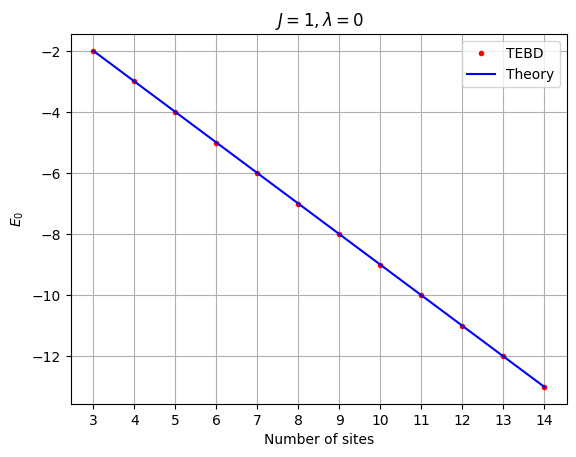

In [10]:
plt.plot(Ns, energies_N, 'ro', markersize=3, label="TEBD")
plt.plot(Ns, energies_theor, "b-", label="Theory")
plt.xlabel("Number of sites")
plt.ylabel("$E_0$")
plt.xticks(Ns)
plt.legend()
plt.title("$J = 1, \lambda=0$")
plt.grid()
plt.savefig('../figures/energy_vs_N_lambda_0.png', bbox_inches='tight', dpi=300);

The results from the TEBD algorithm follow the theoretical values nicely.

Next, consider large values of $\lambda$.

In [11]:
lmda = 100

In [12]:
energies_theor_ext_field = [-N * lmda for N in Ns]

In [13]:
energies_N_lmda_100 = np.zeros(len(Ns))

for i in tqdm(range(len(Ns))):
    observables_at_midsteps = run_tebd_ising(Ns[i], lmda=lmda, observables=observables, print_to_stdout=False)
    energies_N_lmda_100[i] = observables_at_midsteps['energy'][-1]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [10:16<00:00, 51.40s/it]


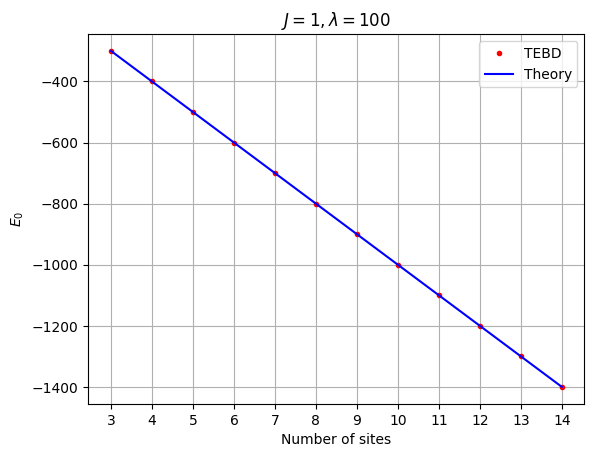

In [14]:
plt.plot(Ns, energies_N_lmda_100, 'ro', markersize=3, label="TEBD")
plt.plot(Ns, energies_theor_ext_field, "b-", label="Theory")
plt.xlabel("Number of sites")
plt.ylabel("$E_0$")
plt.xticks(Ns)
plt.legend()
plt.title(f"$J = 1, \lambda={lmda}$")
plt.grid()
plt.savefig('../figures/energy_vs_N_lambda_100.png', bbox_inches='tight', dpi=300);

Again, the results follow the theoretical expectation in the large $\lambda$ limit.

## Effect of Bond Dimension

In [15]:
d = 2
N = 10

In [16]:
num_iter = 210
mid_steps = 10

In [17]:
bond_dims = [2, 10, 20]

In [18]:
iterations = range(0, num_iter, mid_steps)

In [20]:
energies_bond_dims = np.zeros((len(bond_dims), len(iterations)))

for i in tqdm(range(len(bond_dims))):
    observables_at_midsteps = run_tebd_ising(
        N, bond_dim=bond_dims[i], num_iter=num_iter, mid_steps=mid_steps, observables=observables,
        print_to_stdout=False
    )
    energies_bond_dims[i] = observables_at_midsteps['energy']

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:07<00:00, 22.49s/it]


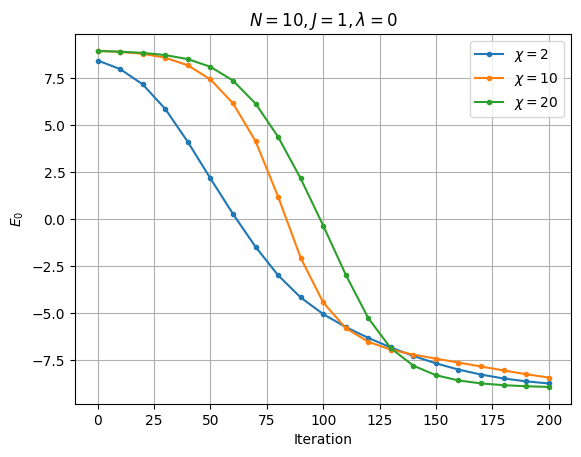

In [21]:
plt.plot(iterations, energies_bond_dims[0], 'o-', markersize=3, label=f"$\chi = {bond_dims[0]}$")
plt.plot(iterations, energies_bond_dims[1], 'o-', markersize=3, label=f"$\chi = {bond_dims[1]}$")
plt.plot(iterations, energies_bond_dims[2], 'o-', markersize=3, label=f"$\chi = {bond_dims[2]}$")
plt.xlabel("Iteration")
plt.ylabel("$E_0$")
plt.legend()
plt.title("$N=10, J=1, \lambda=0$")
plt.grid()
plt.savefig('../figures/energy_vs_iterations_diff_bond_dim.png', bbox_inches='tight', dpi=300);

As the bond dimension increases, the number of iterations to converge usually increases.

## Effect of $J$

In [22]:
Js = [-2, -1, 1, 2]

In [23]:
energies_J = np.zeros((len(Js), len(iterations)))

for i in tqdm(range(len(Js))):
    observables_at_midsteps = run_tebd_ising(
        N, J=Js[i], num_iter=num_iter, mid_steps=mid_steps, observables=observables, print_to_stdout=False
    )
    energies_J[i] = observables_at_midsteps['energy']

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.02s/it]


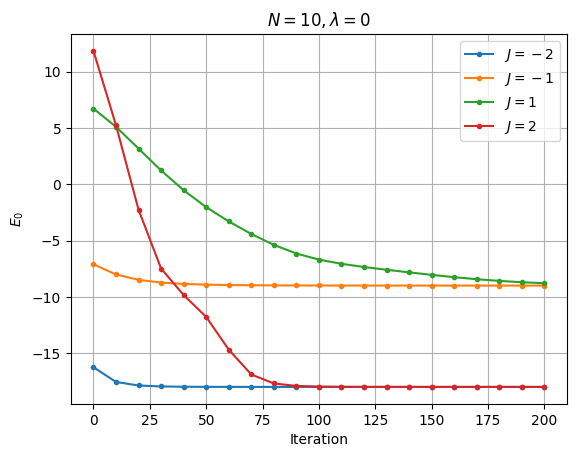

In [24]:
plt.plot(iterations, energies_J[0], 'o-', markersize=3, label=f"$J={Js[0]}$")
plt.plot(iterations, energies_J[1], 'o-', markersize=3, label=f"$J={Js[1]}$")
plt.plot(iterations, energies_J[2], 'o-', markersize=3, label=f"$J={Js[2]}$")
plt.plot(iterations, energies_J[3], 'o-', markersize=3, label=f"$J={Js[3]}$")
plt.xlabel("Iteration")
plt.ylabel("$E_0$")
plt.legend()
plt.title("$N=10, \lambda=0$")
plt.grid()
plt.savefig('../figures/energy_vs_iterations_diff_J.png', bbox_inches='tight', dpi=300);

The energy converges to the same value if $|J|$ is the same. The energy is lower if $|J|$ is greater.

## Effect of Suzuki-Trotter Decomposition

In [25]:
st_orders = ["ST1", "ST2"]

In [26]:
energies_st_orders = np.zeros((len(st_orders), len(iterations)))

for i in tqdm(range(len(st_orders))):
    observables_at_midsteps = run_tebd_ising(
        N, num_iter=num_iter, mid_steps=mid_steps, st_order=st_orders[i], observables=observables,
        print_to_stdout=False
    )
    energies_st_orders[i] = np.real(observables_at_midsteps['energy'])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.10s/it]


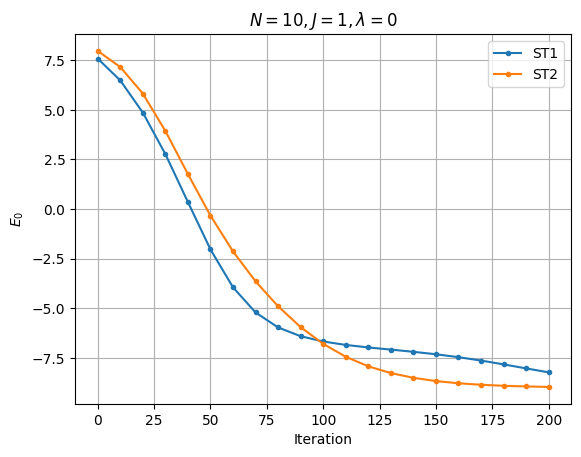

In [27]:
plt.plot(iterations, energies_st_orders[0], 'o-', markersize=3, label=st_orders[0])
plt.plot(iterations, energies_st_orders[1], 'o-', markersize=3, label=st_orders[1])
plt.xlabel("Iteration")
plt.ylabel("$E_0$")
plt.legend()
plt.title("$N= 10, J = 1, \lambda=0$")
plt.grid()
plt.savefig('../figures/energy_vs_iterations_diff_st_order.png', bbox_inches='tight', dpi=300);

The results are inconclusive.

## Entropy

Get entropy for a specific initial state.

In [28]:
N = 10
bond_dim = 2
num_iter = 210
mid_steps = 10

In [29]:
initial_state = '0111111111'

In [30]:
observables = ['entropy']

In [31]:
observables_at_midsteps = run_tebd_ising(
    N, bond_dim=bond_dim, num_iter=num_iter, mid_steps=mid_steps, observables=observables,
    print_to_stdout=False, initial_state=initial_state
)

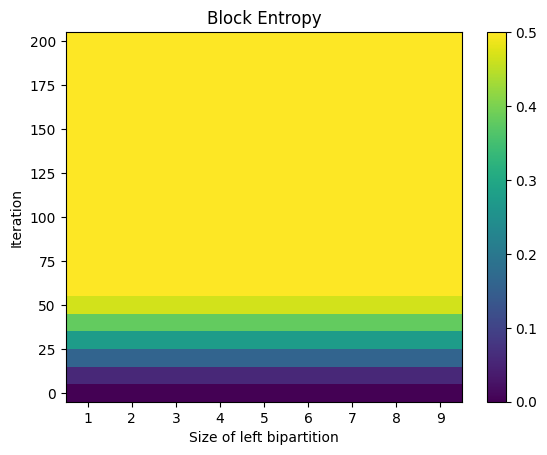

In [32]:
plt.pcolormesh(range(1, N), range(0, num_iter, mid_steps), observables_at_midsteps['entropy'])
plt.set_cmap('viridis')
plt.colorbar()
plt.title('Block Entropy')
plt.ylabel('Iteration')
plt.xlabel('Size of left bipartition')
plt.clim([0, 0.5]);

Get entropy for a random state.

In [33]:
observables_at_midsteps = run_tebd_ising(
    N, bond_dim=bond_dim, num_iter=num_iter, mid_steps=mid_steps, observables=observables, print_to_stdout=False
)

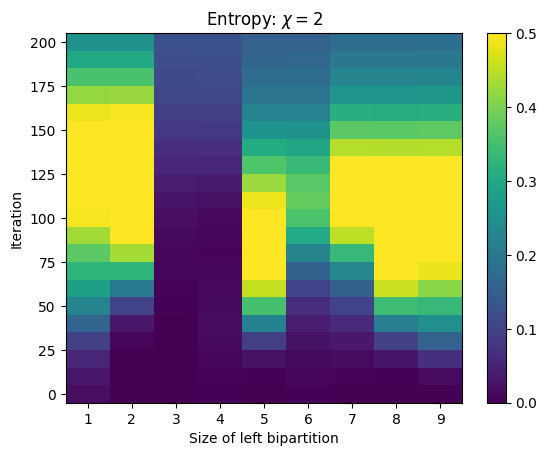

In [34]:
plt.pcolormesh(range(1, N), range(0, num_iter, mid_steps), observables_at_midsteps['entropy'])
plt.set_cmap('viridis')
plt.colorbar()
plt.title('Entropy: $\chi = 2$')
plt.ylabel('Iteration')
plt.xlabel('Size of left bipartition')
plt.clim([0, 0.5]);

Increase bond dimension.

In [35]:
bond_dim = 10

In [36]:
observables_at_midsteps = run_tebd_ising(
    N, bond_dim=bond_dim, num_iter=num_iter, mid_steps=mid_steps, observables=observables, print_to_stdout=False
)

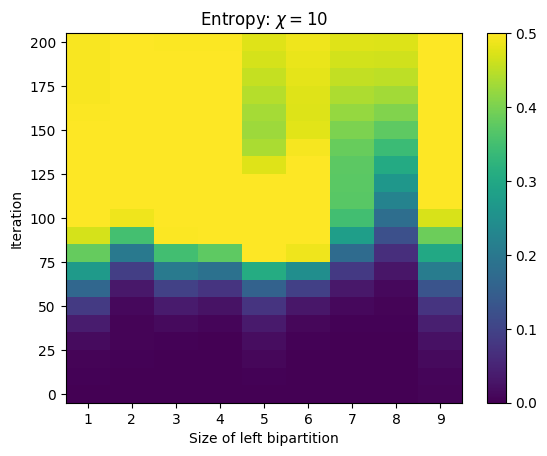

In [37]:
plt.pcolormesh(range(1, N), range(0, num_iter, mid_steps), observables_at_midsteps['entropy'])
plt.set_cmap('viridis')
plt.colorbar()
plt.title('Entropy: $\chi = 10$')
plt.ylabel('Iteration')
plt.xlabel('Size of left bipartition')
plt.clim([0, 0.5]);